# Homework #4: Basic Stats and Probability

## Question 3 Exploring MovieLens Data

Run the setup script first to setup the `movielens` database first:

```shell
cd ~/working/hw04/movielens/
./setup.sh
```

__Instructions:__ 
 * For problems __(A)__ and __(B)__ fill in SQL queries for q3a and q3b in the space provided. 
 * For problem __(C)__ fill in your answer in the markdown cell (where it says _Type in your answer..._)
 * Run all the cells to show the outputs. 

In [1]:
!pip3 install matplotlib
!pip install matplotlib

/bin/sh: 1: pip3: not found
  Using cached matplotlib-2.1.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached pyparsing-2.2.0-py2.py3-none-any.whl
  Using cached backports.functools_lru_cache-1.5-py2.py3-none-any.whl
    100% |████████████████████████████████| 512kB 1.4MB/s ta 0:00:01
  Using cached six-1.11.0-py2.py3-none-any.whl
  Using cached python_dateutil-2.6.1-py2.py3-none-any.whl
  Using cached cycler-0.10.0-py2.py3-none-any.whl
  Using cached numpy-1.14.0-cp27-cp27mu-manylinux1_x86_64.whl
You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = psycopg2.connect("dbname=movielens")
cursor = conn.cursor()

__(A)__ Compute the mean and standard deviation of ratings by movie genre and reviewer gender. (In PostgreSQL, there is an aggregation function called STDDEV.) Sort the results by mean in descending order. The top three rows of your output should look like this:

        genre     | gender |        avg         |         stddev         
    --------------+--------+--------------------+------------------------
     film_noir    | M      | 3.9732937685459941 | 0.95831397959902417403
     war          | M      | 3.8263282008600361 |     1.0689702552913549
     war          | F      | 3.7811786203746003 |     1.1162307132041698

In [5]:
# fill in the sql query for 3a
q3a = """
SELECT m.genre, u.gender, AVG(r.rating), STDDEV(r.rating)
FROM ratings r, movie_genre m, users u
WHERE r.movie_id = m.id AND r.user_id = u.id
GROUP BY m.genre, u.gender
ORDER BY 3 DESC;
"""
pd.read_sql(q3a, con=conn)

,genre,gender,avg,stddev
0,film_noir,M,3.973294,0.958314
1,war,M,3.826328,1.068970
2,war,F,3.781179,1.116231
3,film_noir,F,3.740260,1.089756
4,drama,M,3.696957,1.059785
5,documentary,M,3.691769,1.145358
6,mystery,M,3.664208,1.081742
7,drama,F,3.662246,1.127964
8,romance,F,3.655685,1.143645
9,crime,M,3.654049,1.097242


__(B)__ Plot a histogram for the distribution of average ratings for movies.  In other words, you need to run a sql query to get every movie's average rating, and then plot a histogram for the query results.

Text(0.5,1,u'distribution of average ratings for all movies')

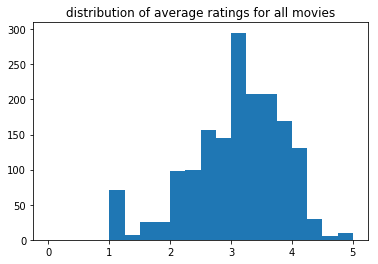

In [6]:
# fill in the sql query to generate every movie's average rating
q3b = """
SELECT movie_id, AVG(rating)
FROM ratings
GROUP BY movie_id;
"""
cursor.execute(q3b)
# a Python list to store the query results
ratings = [float(rating) for _, rating in cursor.fetchall()]
# we take care of the plotting (using the Matplotlib library) for you, just run it
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(ratings, range=(0.0, 5.0), bins=20)
ax.set_title('distribution of average ratings for all movies')

__(C)__ Suppose a user rates the two movies _To Be or Not to Be_ (1942) and _Bad Taste_ (1987).  What are the odds that this user is female, based on the data given?

The most straightforward method would just look at all users who have rated these two movies, compute the breakdown of the number of reviewers by gender, and use that ratio to predict the gender of the mysterious reviewer.  Does this method work in this case?  If not, what can you do?

_Hint:_ To make this problem a bit less open-ended, you may assume the following (but feel free to come up with your own assumptions):

* We will only use the following information in making our bet: `movies(id, title)`, `ratings(user_id, movie_id)`, and `users(id, gender)`.

* Given a user's gender, the chances that the user rates any two given movies are independent.  In other words, P($U$ rates movies $A$ and $B$ | $U$ is female) = P($U$ rates $A$ | $U$ is female) $\times$ P($U$ rates $B$ | $U$ is female) (and the same goes for male).

Step 1: Write out equation 

(Probability user rate both movies) (Probability user is female)

P(User rates To Be or Not to Be | User is Female) x P(User rates Bad Taste| User is Female) x P(User is Female)

Step 2: SQL query to sort number of ratings for To Be or Not to Be and Bad Taste by gender and title

SELECT gender, title, COUNT(*)
FROM ratings r, users u, movies m
WHERE movie_id = m.id AND title in ('To Be or Not to Be (1942)', 'Bad Taste (1987)')
AND user_id = u.id
GROUP BY gender, title;

Step 3: SQL query to find total number of users grouped by gender 

SELECT gender, COUNT(*)
FROM users
GROUP BY gender;

Step 4: Calculation 

P(User rates To Be or Not to Be & User rates Bad Taste| User is Female) x P(User is Female) = 3/273 x 3/273 x 273/943 

= 3.496 x 10^-5

P(User rates To Be or Not to Be & User rates Bad Taste| User is Male) x P(User is Male) = 12/670 x 15/670 x 670/943

= 3.086 x 10^-4

--> In Ratio Form = 0.113 : 1

So the probablity that the user rates the two movies To Be or Not to Be (1942) and Bad Taste (1987) and is a female is 0.113 or 11.3%






_(Type your answer with Markdown here. You may need to run some sql queries on the database, so feel free to insert Python code cells like the one in 3(A).)_

In [7]:
# don't forget to close the connection to the database when you are done.
cursor.close()
conn.close()

_Common error regarding the `psycopg2` library:_
"**current transaction is aborted, commands ignored until end of transaction block and can’t do anything else**"

If you give the database an unlawful query, the database will be stuck into an error state, and the database will not recover automatically from this condition. So you must run a [rollback()](http://initd.org/psycopg/docs/connection.html#connection.rollback) before sending new commands to the session.

To do this, just insert a cell wherever in the notebook, type the following command in the cell:

```python
conn.rollback()
```

and then run the cell. After this the database is able to rollback to the normal state, and you can run your next query.

Another way to get away from this error is to simply rerun all the cells in order from the beginning.